<strong><font size="6"> Computations and Figures for a Department of Statistics Colloquim at Purdue University </font></strong>

<font size="5">presented on Friday, March 3, 2023 </font>


# Import the necessary packages and set up plotting routines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp
import time  #timing routines
import warnings  #to suppress warnings when needed
import pickle  #write output to a file and load it back in
from copy import deepcopy

plt.rc('font', size=16)  #set defaults so that the plots are readable
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,
                           pt_clr=['tab:blue', 'tab:green', 'k', 'tab:cyan', 'tab:purple', 'tab:orange'],
                           xlim=[0,1],ylim=[0,1]):
  fig,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,0],points[nstart:n,1],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,1}$')
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,2}$')
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name, y=0.87)
  return fig

print('QMCPy Version',qp.__version__)

QMCPy Version 1.3.2


## Set the path to save the figures here

In [2]:
figpath = '' #this path sends the figures to the directory that you want

# Here are some plots of IID and Low Discrepancy (LD) Points
## Lattice points first

[[0.87332128 0.42044361 0.24244192 0.20926663 0.40101654]
 [0.37332128 0.92044361 0.74244192 0.70926663 0.90101654]
 [0.12332128 0.17044361 0.99244192 0.45926663 0.65101654]
 [0.62332128 0.67044361 0.49244192 0.95926663 0.15101654]
 [0.99832128 0.79544361 0.61744192 0.33426663 0.52601654]
 [0.49832128 0.29544361 0.11744192 0.83426663 0.02601654]
 [0.24832128 0.54544361 0.36744192 0.58426663 0.77601654]
 [0.74832128 0.04544361 0.86744192 0.08426663 0.27601654]
 [0.93582128 0.10794361 0.42994192 0.27176663 0.96351654]
 [0.43582128 0.60794361 0.92994192 0.77176663 0.46351654]
 [0.18582128 0.85794361 0.17994192 0.52176663 0.21351654]
 [0.68582128 0.35794361 0.67994192 0.02176663 0.71351654]
 [0.06082128 0.48294361 0.80494192 0.39676663 0.08851654]
 [0.56082128 0.98294361 0.30494192 0.89676663 0.58851654]
 [0.31082128 0.23294361 0.55494192 0.64676663 0.33851654]
 [0.81082128 0.73294361 0.05494192 0.14676663 0.83851654]]


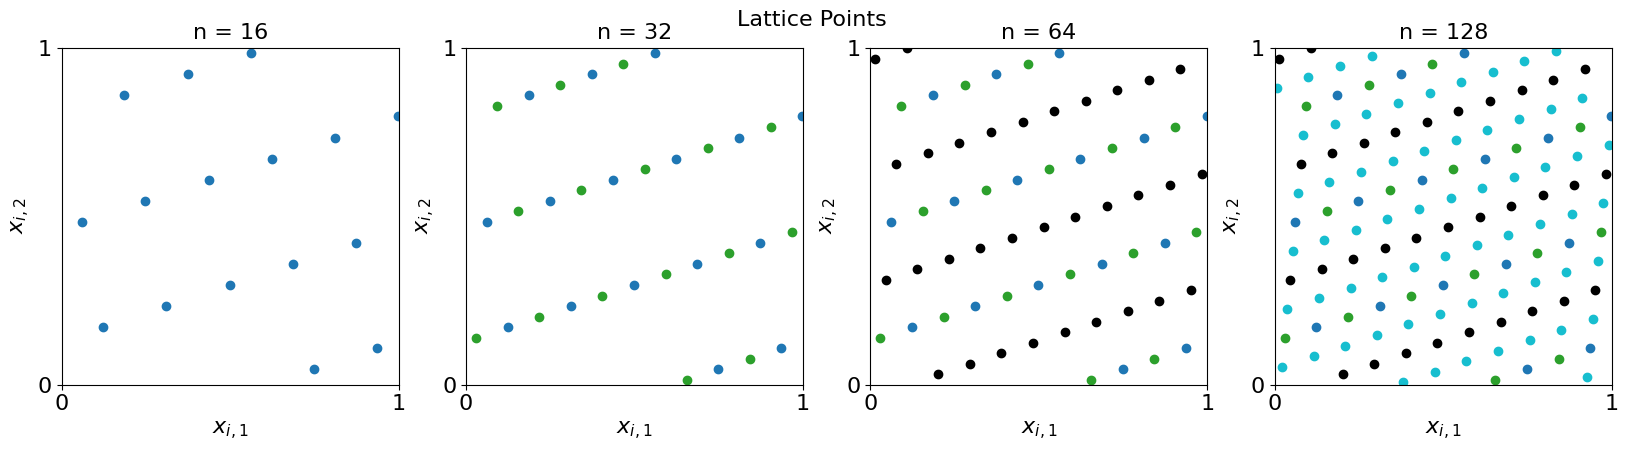

In [3]:
d = 5 #dimension
n = 16 #number of points
ld = qp.Lattice(d) #define the generator
xpts = ld.gen_samples(n) #generate points
print(xpts)
fig = plot_successive_points(ld,'Lattice',first_n=n,n_cols=4)
fig.savefig(figpath+'latticepts.eps',format='eps')

## Next Sobol' points

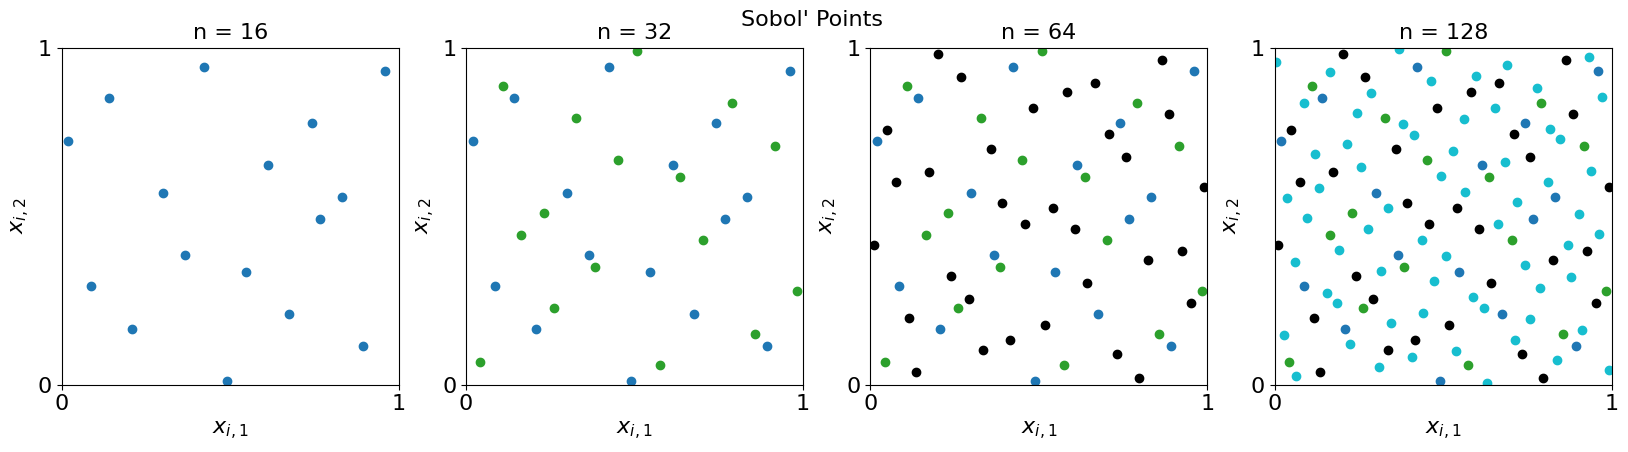

In [4]:
ld = qp.Sobol(d) #define the generator
xpts_Sobol = ld.gen_samples(n) #generate points
fig = plot_successive_points(ld,'Sobol\'',first_n=n,n_cols=4)
fig.savefig(figpath+'sobolpts.eps',format='eps')

## Compare to IID

Note that there are more gaps and clusters

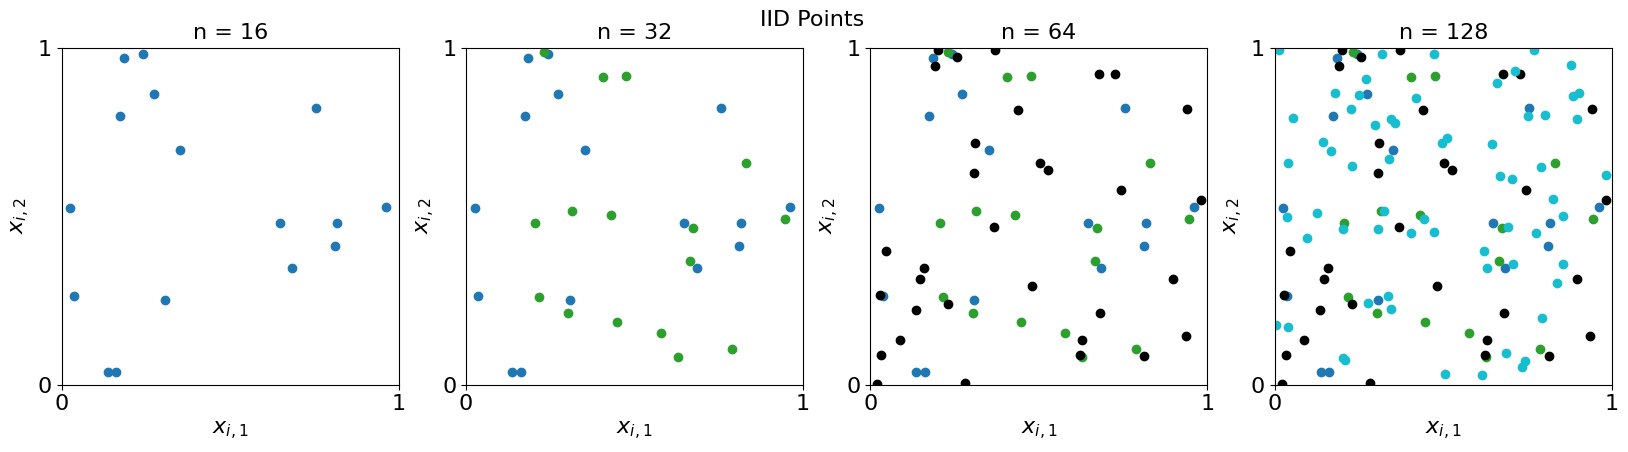

In [5]:
iid = qp.IIDStdUniform(d) #define the generator
xpts = ld.gen_samples(n) #generate points
xpts
fig = plot_successive_points(iid,'IID',first_n=n,n_cols=4)
fig.savefig(figpath+'iidpts.eps',format='eps')

# Beam Example Figures

Using computations done below

## First we compute the time required to solve for the deflection of the end point using IID and low discrepancy 

In [1]:
ld = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=1,upper_bound=1.2) #lattice points for this problem
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
tol = 0.02  #smallest tolerance

n_tol = 8
#ii_iid = 2  #make this larger to reduce the time required
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
#iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0: 
    print(f'\nCantilever Beam\n')
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  #if ii >= ii_iid:
  #  solution, data = qmcpy.CubMCG(iid_keister, abs_tol = tol_vec[ii]).integrate()
  #  iid_time[ii] = data.time_integrate
  #  iid_n[ii] = data.n_total
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='b'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
#ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='g'); 
#ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='b'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
#ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='g'); 
#ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend([r'$\mathcal{O}(\varepsilon^{-1})$',r'$\mathcal{O}(\varepsilon^{-2})$','LD','IID'],frameon=False)
  ax[ii].set_aspect(0.35)

NameError: name 'qp' is not defined

In [8]:
print(data)

LDTransformData (AccumulateData Object)
    solution        [   0.       4.097   15.631 ...  960.504  998.786 1037.103]
    comb_bound_low  [   0.       4.093   15.618 ...  959.479  997.717 1035.992]
    comb_bound_high [   0.       4.1     15.644 ...  961.53   999.854 1038.215]
    comb_flags      [ True  True  True ...  True  True  True]
    n_total         2^(10)
    n               [1024. 1024. 1024. ... 1024. 1024. 1024.]
    time_integrate  6.948
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         2.560
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
UMBridgeWrapper (Integrand Object)
Uniform (TrueMeasure Object)
    lower_bound     1
    upper_bound     1.200
Lattice (DiscreteDistribution Object)
    d               3
    dvec            [0 1 2]
    randomize       1
    order           natural
    gen_vec         [     1 182667 469891]
    entropy         7
    spawn_key       ()



Cantilever Beam



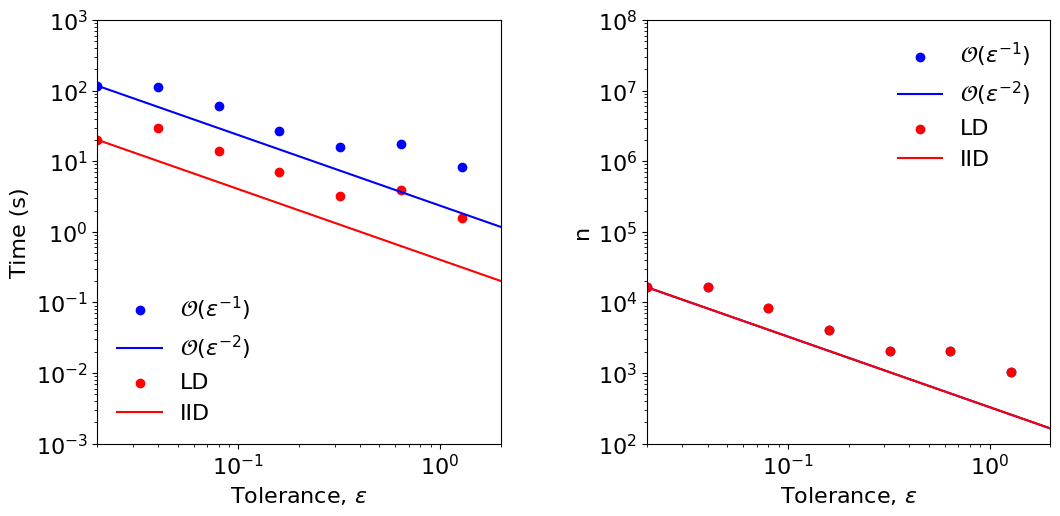

In [9]:
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  if ii == 0: 
    print(f'\nCantilever Beam\n')
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  #if ii >= ii_iid:
  #  solution, data = qmcpy.CubMCG(iid_keister, abs_tol = tol_vec[ii]).integrate()
  #  iid_time[ii] = data.time_integrate
  #  iid_n[ii] = data.n_total
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='b'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[0].scatter(tol_vec[0:n_tol],ld_p_time[0:n_tol],color='r'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_p_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='r')
#ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='g'); 
#ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='b'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[1].scatter(tol_vec[0:n_tol],ld_p_n[0:n_tol],color='r'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_p_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='r')
#ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='g'); 
#ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend([r'$\mathcal{O}(\varepsilon^{-1})$',r'$\mathcal{O}(\varepsilon^{-2})$','LD','IID'],frameon=False)
  ax[ii].set_aspect(0.35)

In [10]:
!docker rm -f muqbp #shut down docker image

IOStream.flush timed out
IOStream.flush timed out
muqbp


In [11]:
assert False

AssertionError: 

<font size="5"> Below is long-running code, that we rarely wish to run </font>

# Beam Example Computations
## Set up the problem using a docker container to solve the ODE

To run this, you need to be running the docker application, https://www.docker.com/products/docker-desktop/

In [7]:
import umbridge #this is the connector
!docker run --name muqbp -d -it -p 4243:4243 linusseelinger/benchmark-muq-beam-propagation:latest #get beam example
d = 3 #dimension of the randomness
lb = 1 #lower bound on randomness
ub = 1.2 #upper bound on randomness
umbridge_config = {"d": d}
model = umbridge.HTTPModel('http://localhost:4243','forward') #this is the original model
outindex = -1 #choose last element of the vector of beam deflections
modeli = deepcopy(model) #and construct a model for just that deflection
modeli.get_output_sizes = lambda *args : [1]
modeli.get_output_sizes()
modeli.__call__ = lambda *args,**kwargs: [[model.__call__(*args,**kwargs)[0][outindex]]]

docker: Error response from daemon: Conflict. The container name "/muqbp" is already in use by container "55980e6b8b0c6681b1da8cff199b4b86c77e53c79f12b8ac25deff66939a6ce6". You have to remove (or rename) that container to be able to reuse that name.
See 'docker run --help'.


## First we compute the time required to solve for the deflection of the end point using IID and low discrepancy 

In [ ]:
ld = qp.Uniform(qp.Lattice(d,seed=7),lower_bound=lb,upper_bound=ub) #lattice points for this problem
ld_integ = qp.UMBridgeWrapper(ld,modeli,umbridge_config,parallel=False) #integrand
iid = qp.Uniform(qp.IIDStdUniform(d),lower_bound=lb,upper_bound=ub) #iid points for this problem
iid_integ = qp.UMBridgeWrapper(iid,modeli,umbridge_config,parallel=False) #integrand
tol = 0.01  #smallest tolerance

n_tol = 14  #number of different tolerances
ii_iid = 9  #make this larger to reduce the time required by not running all cases for IID
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution_i = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  if ii >= ii_iid:
    solution, data = qp.CubMCG(iid_integ, abs_tol = tol_vec[ii]).integrate()
    iid_time[ii] = data.time_integrate
    iid_n[ii] = data.n_total
  print(ii, end = ' ')
with open(figpath+'iid_ld.pkl','wb') as myfile:pickle.dump([tol_vec,n_tol,ii_iid,ld_time,ld_n,iid_time,iid_n,best_solution_i],myfile)


Cantilever Beam

iteration 

## Next, we compute the time required to solve for the deflection of the whole beam using low discrepancy with and without parallel

In [ ]:
ld_integ = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=False) #integrand
ld_integ_p = qp.UMBridgeWrapper(ld,model,umbridge_config,parallel=8) #integrand with parallel processing

tol = 0.01
n_tol = 9  #number of different tolerances
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize vector of tolerances
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
ld_p_time = [0]*n_tol; ld_p_n = [0]*n_tol  #low discrepancy time and number of function values with parallel
print(f'\nCantilever Beam\n')
print('iteration ', end = '')
for ii in range(n_tol):
  solution, data = qp.CubQMCLatticeG(ld_integ, abs_tol = tol_vec[ii]).integrate()
  if ii == 0:
    best_solution = solution
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  solution, data = qp.CubQMCLatticeG(ld_integ_p, abs_tol = tol_vec[ii]).integrate()
  ld_p_time[ii] = data.time_integrate
  ld_p_n[ii] = data.n_total
  print(ii, end = ' ') 
with open(figpath+'ld_parallel.pkl','wb') as myfile:pickle.dump([tol_vec,n_tol,ld_time,ld_n,ld_p_time,ld_p_n,best_solution],myfile)

## Shut down docker

In [ ]:
!docker rm -f muqbp #shut down docker image